In [14]:
import scipy.stats as stats
import numpy as np

x = np.linspace(0, 5, 10, endpoint=False)
y = stats.multivariate_normal.pdf(x, mean=2.5, cov=0.5)

In [15]:
y

array([0.00108914, 0.01033349, 0.05946514, 0.20755375, 0.43939129,
       0.56418958, 0.43939129, 0.20755375, 0.05946514, 0.01033349])

In [16]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

## Matlab output(as ref)
y =

    0.0011
    0.0103
    0.0595
    0.2076
    0.4394
    0.5642
    0.4394
    0.2076
    0.0595
    0.0103


# Test for z-shape mumeric

In [32]:
%matplotlib qt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm

def generate_potential_2d_Zshape_numeric(IN_n_states,flag_visualize):
    """
    The Zshape surface is a weighted sum of 2d Normal distributions and
    exponential functions
    
    INPUT : 
    [IN_n_states] : array with integers giving the number of states is each dimension
    (IN_n_states = [100,50] then x = linspace(x_min,x_max,n_states(1)) and y = linspace(x_min,x_max,n_states(2))
    [IN_n_states] : array with integers giving the number of states is each
    """
    # Q1: Will we change the limit later? A: Not required, could be optional paras.
    x_min = -2
    x_max = 2
    y_min = -1
    y_max = 3
    # Q2: The length of each range should be the same for now.

    x = np.linspace(x_min,x_max,IN_n_states[0]);
    y = np.linspace(y_min,y_max,IN_n_states[1]);

    #---Hyper-parameters---#
    border_coeff = 1; # Coefficient of borders 
    well_coeff = 10; # Coefficient of wells (larger value makes wells deeper and barrier between them bigger)


    #---PARAMETERS OF NORMAL DISTRIBUTIONS---#
    # Section "Bivariate case" in [https://en.wikipedia.org/wiki/Multivariate_normal_distribution]
    mu_1 = [-1.5,-0.5]
    mu_2 = [1.5,2.5]
    sigm_center_well = 0.4 # Sigma of some of the wells, sigm for sigma
    covar_mat_well = np.diag(np.dot(np.ones((len(IN_n_states))),sigm_center_well))
    ###Debugging
    print(covar_mat_well)

    mu_3 = [-0.5, 0]
    sig = [0.7, 0.28] # Origion: [1, 0.4] * 0.7 = result, flat one
    ro = 0.7
    colvar_mat_3 = [[sig[0]**2, ro*sig[0]*sig[1]],[ro*sig[0]*sig[1], sig[1]**2]]

    mu_4 = [0, 1]
    sig = [0.7, 0.7] # Origion: [1, 1] * 0.7, Diagonal one
    ro = -0.8
    colvar_mat_4 = [[sig[0]**2, ro*sig[0]*sig[1]],[ro*sig[0]*sig[1], sig[1]**2]]

    mu_5 = [0.5, 2]
    sig = [0.7, 0.28] # Origion: [1, 0.4] * 0.7 = result, flat one
    ro = 0.7
    colvar_mat_5 = [[sig[0]**2, ro*sig[0]*sig[1]],[ro*sig[0]*sig[1], sig[1]**2]]

    #---INSTANTIATION---#
    potential_numeric = np.zeros(IN_n_states)

    #---Run---#
    for x_id in tqdm(range(IN_n_states[0])):
        for y_id in range(IN_n_states[1]):

            #--Borders (Potential increase to infinity outside of [x_min,x_max] and [y_min,y_max])--#
            border_1 = np.exp(x_min - x[x_id])
            border_2 = np.exp(x[x_id] - x_max)
            border_3 = np.exp(y_min - y[y_id])
            border_4 = np.exp(y[y_id] - y_max)

            #--WELLS--# # This requires multivariate normal distribution generating function
            well_1 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_1, cov=covar_mat_well)
            well_2 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_2, cov=covar_mat_well)
            well_3 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_3, cov=colvar_mat_3) # Numeric expression
            well_4 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_4, cov=colvar_mat_4)
            well_5 = stats.multivariate_normal.pdf(x=[x[x_id],y[y_id]],mean=mu_5, cov=colvar_mat_5)  

            border_contribution = (border_1 + border_2 + border_3 + border_4) * border_coeff
            well_contribution = (well_1 + well_2+ well_3+ well_4 + well_5) * well_coeff

            potential_numeric[x_id,y_id] = border_contribution - well_contribution

    if flag_visualize:
        #assert()
        x, y = np.meshgrid(x, y)
        z = potential_numeric
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,\
                            linewidth=0, antialiased=False)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        fig.colorbar(surf, shrink=0.5, aspect=5)
        
    return potential_numeric, x, y

    # Sympy
    # TODO

In [44]:
test_instates = [100,100]

In [33]:
test_potential, test_x, test_y = generate_potential_2d_Zshape_numeric(test_instates, True)

  0%|          | 0/500 [00:00<?, ?it/s]

[[0.4 0. ]
 [0.  0.4]]


100%|██████████| 500/500 [02:00<00:00,  4.15it/s]


In [31]:
%matplotlib qt
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np 
x = test_x
y = test_y
x, y = np.meshgrid(x, y)
z = test_potential
fig = plt.figure()
ax = plt.axes(projection='3d')

surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,\
                       linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

fig.colorbar(surf, shrink=0.5, aspect=5)


In [46]:
import numpy as np
import sympy as spy

def generate_potential_2d_spirals_numeric(IN_n_states,IN_number_of_branches,flag_visualize):
    """
    The spiral surface is a modification of the Anormal distribution, which is
    a kind of generalization of the multivariate normal distribution

    INPUT : 
    [IN_n_states] : array with integers giving the number of states is each dimension
    (IN_n_states = [100,50] then x = linspace(x_min,x_max,n_states(1)) and y = linspace(x_min,x_max,n_states(2))
    [IN_n_states] : array with integers giving the number of states is each
    """
    x_min = -20
    x_max = 20
    y_min = -20
    y_max = 20

    x = np.linspace(x_min,x_max,IN_n_states[0])
    y = np.linspace(y_min,y_max,IN_n_states[1])

    # Hyper Parameters
    sigma = 0.35 # Spiral
    warping_coeff = 0.01
    decrease_coeff = 0.05 # decrease how Potential decrease when we get further from center
    sinus_to_distance_coeff = 0.1

    # Instantiation
    potential_numeric = np.zeros(IN_n_states)

    # Run
    n_petals = IN_number_of_branches
    for x_id in tqdm(range(IN_n_states[0])):
        for y_id in range(IN_n_states[1]):

            # Transform coordinates from (x,y) to (angle,Distance)
            angle = np.arctan2(x[x_id], y[y_id])
            distance_squared = x[x_id]**2 + y[y_id]**2;  # BIG MODIFICATION
            
            # Use the chosen shape function
            r = (np.sin((angle+warping_coeff*distance_squared)*n_petals)*sinus_to_distance_coeff*distance_squared+2)

            # Apply the formula
            potential_numeric[x_id,y_id] = -1*np.exp( -1/2*(1)/(sigma*r)**2)*(1+decrease_coeff*distance_squared)

    potential_numeric = potential_numeric - np.min(potential_numeric[:]) # Shift so that minimum=0
    potential_numeric = potential_numeric/np.sum(potential_numeric[:]) # Normalize at the end because used non-normalized shape function r.

    if flag_visualize:
        x, y = np.meshgrid(x, y)
        z = potential_numeric
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm,\
                            linewidth=0, antialiased=False)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        fig.colorbar(surf, shrink=0.5, aspect=5)
        
    return potential_numeric, x, y

# Sympy
# TODO

In [47]:
test_potential, test_x, test_y = generate_potential_2d_spirals_numeric([100,100], 2, True)

100%|██████████| 100/100 [00:00<00:00, 1020.77it/s]


In [48]:
test_potential, test_x, test_y = generate_potential_2d_Zshape_numeric(test_instates, True)

  4%|▍         | 4/100 [00:00<00:06, 15.38it/s]

[[0.4 0. ]
 [0.  0.4]]


100%|██████████| 100/100 [00:06<00:00, 16.19it/s]


In [58]:
a = np.array([np.nan] * 100)
a_affix = [1] * 50

In [51]:
b = range(100)

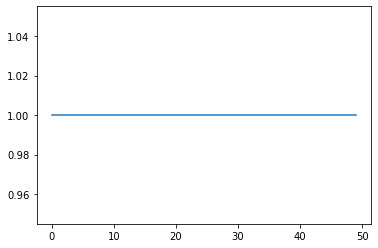

In [59]:
%matplotlib inline
a[0:50] = 1
plt.plot(b,a)
plt.show()

In [60]:
print(a)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
